# Bivariate Data in PLT and Seaborn
#python/matplotlib
#python/seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


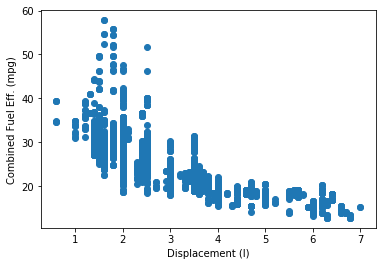

In [3]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

/Users/jamie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


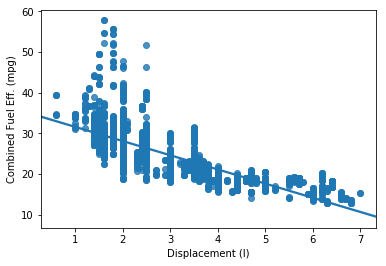

In [4]:
#Seaborn's regplot also creates a scatter plot but will also plot a regression line to the data
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

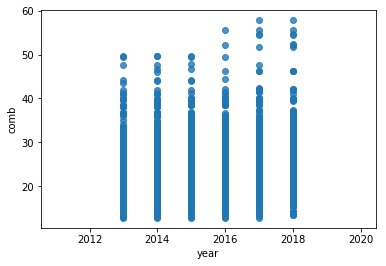

In [5]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', fit_reg = False);


Hard to make out any pattern. Can add jitter and/or transaparency to halp with this.

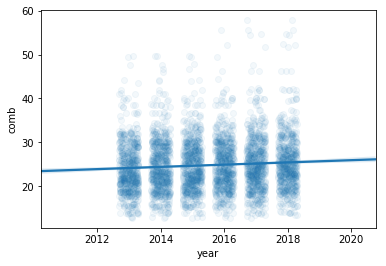

In [6]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = .3,
          scatter_kws = {'alpha': (1/20)})

We can take the above scatter plot and plot as a heatmap to better understand the data.

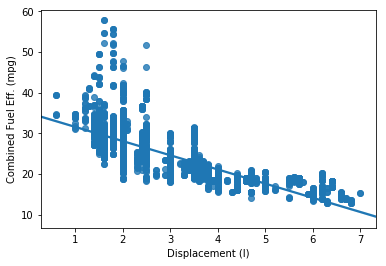

In [7]:
#Seaborn's regplot also creates a scatter plot but will also plot a regression line to the data
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

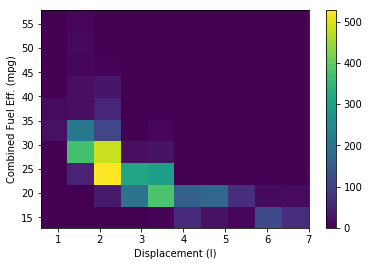

In [8]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

We can use some additional features to acheive more information from this plot:

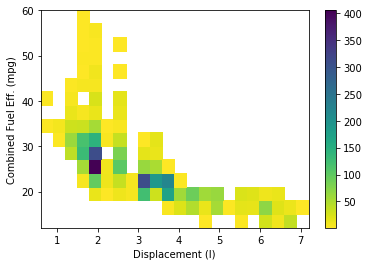

In [9]:
bins_x = np.arange(0.6, 7 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

---
### Violin Plots
Used for visualisations of quantitative against qualitative variables.

In [10]:
fuel_econ.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


In [11]:
# Use pandas to change Vclass column from a plain object type into a categorical type in order of size
vehicle_types = list(fuel_econ['VClass'].unique())
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = vehicle_types)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
fuel_econ['VClass'].dtype

CategoricalDtype(categories=['Subcompact Cars', 'Compact Cars', 'Midsize Cars',
                  'Large Cars', 'Minicompact Cars'],
                 ordered=True)

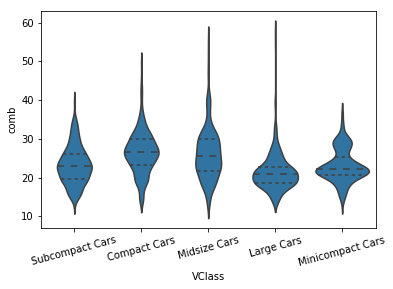

In [12]:
base_colour = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
             color = base_colour, inner = 'quartile')
plt.xticks(rotation = 15);

---
### Box Plots

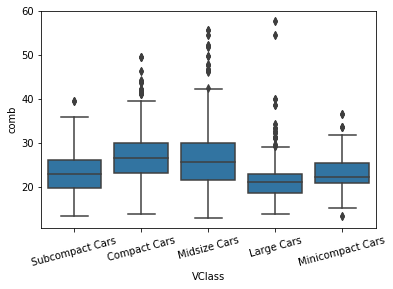

In [13]:
base_colour = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
             color = base_colour)
plt.xticks(rotation = 15);

---
### Clustered Bar Chart

In [14]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [15]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


In [16]:
#We need to do some summarisation tasks manually before we ca create a heat map of the data.
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size() 
#This gives us a pandas series that contains the number of each transmission type for each type of car.
ct_counts = ct_counts.reset_index(name = 'count') #next use .reset_index() to convert the series into a data frame
#finally, use .pivot() to change the rows, columns, and values.
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')

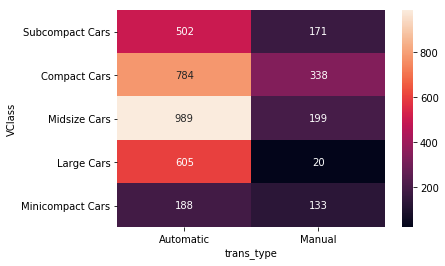

In [17]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');

This heatmap does not allow for a particularly easy to interprate visualisation. Instead we can use a clustered bar chart.

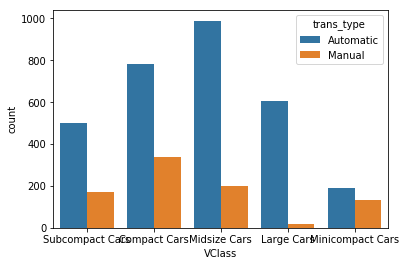

In [18]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');

---
### Faceting

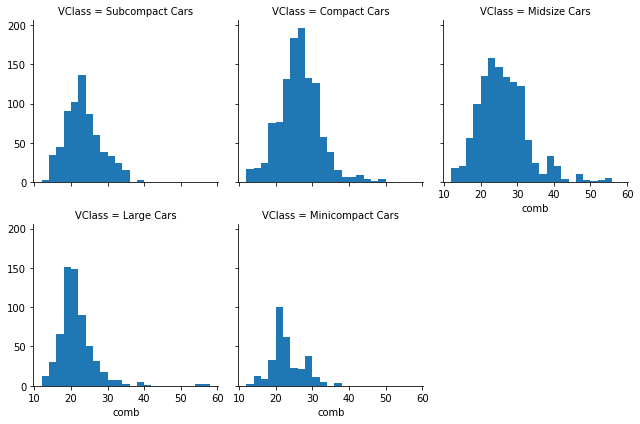

In [19]:
bins = np.arange(12, 58 + 2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3);
g.map(plt.hist, 'comb', bins = bins);

---
### Adapted Bar Plots

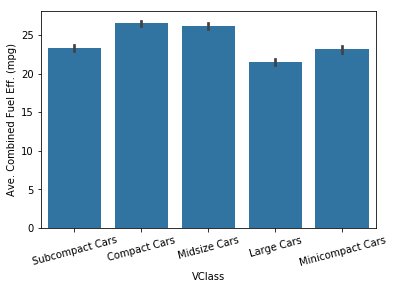

In [20]:
base_colour = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb',
             color = base_colour)
plt.xticks(rotation = 15);
plt.ylabel('Ave. Combined Fuel Eff. (mpg)');

---
### Line Plots

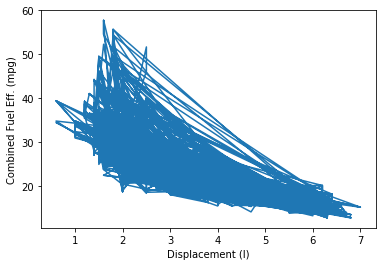

In [21]:
plt.errorbar(data = fuel_econ, x = 'displ' , y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

This plot is extremely unhelpful, we need to do some data cleansing first. We need the data to be sorted by the x variable and only have one corresponding y value for each x value.

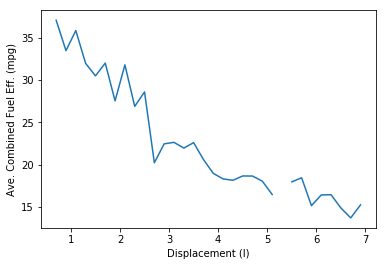

In [27]:
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centres = bin_edges[:-1] + 0.1 #centre is 0.1 large than each edge. Does not include final edge.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()


plt.errorbar(x = bin_centres, y = comb_mean)
plt.xlabel('Displacement (l)')
plt.ylabel('Ave. Combined Fuel Eff. (mpg)');

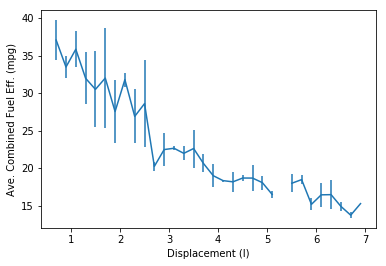

In [29]:
# We can also include the std
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

plt.errorbar(x = bin_centres, y = comb_mean, yerr = comb_std)
plt.xlabel('Displacement (l)')
plt.ylabel('Ave. Combined Fuel Eff. (mpg)');